In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime


In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

574

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tindivanam
Processing Record 2 of Set 1 | katsuura
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | victoria
Processing Record 8 of Set 1 | kamenskoye
City not found. Skipping...
Processing Record 9 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | luwuk
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | kaitangata
Processing Record 14 of Set 1 | salalah
Processing Record 15 of Set 1 | pevek
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | georgetown
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | labuhan
Processing Record 20 of Set 1 | kendari
Processing Record 2

Processing Record 33 of Set 4 | saint george
Processing Record 34 of Set 4 | alofi
Processing Record 35 of Set 4 | opuwo
Processing Record 36 of Set 4 | yellowknife
Processing Record 37 of Set 4 | honningsvag
Processing Record 38 of Set 4 | sanchor
Processing Record 39 of Set 4 | vanderhoof
Processing Record 40 of Set 4 | marawi
Processing Record 41 of Set 4 | beloha
Processing Record 42 of Set 4 | avarua
Processing Record 43 of Set 4 | betioky
Processing Record 44 of Set 4 | coahuayana
Processing Record 45 of Set 4 | rantauprapat
Processing Record 46 of Set 4 | guarare
Processing Record 47 of Set 4 | la asuncion
Processing Record 48 of Set 4 | guangyuan
Processing Record 49 of Set 4 | saint-philippe
Processing Record 50 of Set 4 | ringebu
Processing Record 1 of Set 5 | pato branco
Processing Record 2 of Set 5 | mar del plata
Processing Record 3 of Set 5 | scarborough
Processing Record 4 of Set 5 | dunedin
Processing Record 5 of Set 5 | igarka
Processing Record 6 of Set 5 | pacific gro

Processing Record 21 of Set 8 | yabelo
Processing Record 22 of Set 8 | fortuna
Processing Record 23 of Set 8 | lompoc
Processing Record 24 of Set 8 | riberalta
Processing Record 25 of Set 8 | the pas
Processing Record 26 of Set 8 | shingu
Processing Record 27 of Set 8 | bur gabo
City not found. Skipping...
Processing Record 28 of Set 8 | grand gaube
Processing Record 29 of Set 8 | gualaquiza
Processing Record 30 of Set 8 | troitskoye
Processing Record 31 of Set 8 | bethanien
Processing Record 32 of Set 8 | vao
Processing Record 33 of Set 8 | puerto ayacucho
Processing Record 34 of Set 8 | najran
Processing Record 35 of Set 8 | mahajanga
Processing Record 36 of Set 8 | fos-sur-mer
Processing Record 37 of Set 8 | jiddah
City not found. Skipping...
Processing Record 38 of Set 8 | manokwari
Processing Record 39 of Set 8 | yanan
City not found. Skipping...
Processing Record 40 of Set 8 | la rioja
Processing Record 41 of Set 8 | gizo
Processing Record 42 of Set 8 | umm bab
Processing Record 

Processing Record 10 of Set 12 | ulladulla
Processing Record 11 of Set 12 | siddapur
Processing Record 12 of Set 12 | athabasca
Processing Record 13 of Set 12 | rapid city
Processing Record 14 of Set 12 | yumen
Processing Record 15 of Set 12 | catamarca
Processing Record 16 of Set 12 | praxedis guerrero
Processing Record 17 of Set 12 | champasak
Processing Record 18 of Set 12 | kachikau
City not found. Skipping...
Processing Record 19 of Set 12 | roura
Processing Record 20 of Set 12 | conde
Processing Record 21 of Set 12 | harper
Processing Record 22 of Set 12 | kokopo
Processing Record 23 of Set 12 | warrington
Processing Record 24 of Set 12 | port lincoln
-----------------------------
Data Retrieval Complete      
-----------------------------


In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tindivanam,12.2500,79.6500,85.73,70,52,9.06,IN,2022-04-16 17:52:09
1,Katsuura,35.1333,140.3000,52.61,71,95,10.33,JP,2022-04-16 17:52:10
2,Atuona,-9.8000,-139.0333,78.93,79,24,18.48,PF,2022-04-16 17:50:58
3,Bluff,-46.6000,168.3333,41.81,68,83,1.72,NZ,2022-04-16 17:52:11
4,Victoria,22.2855,114.1577,72.18,75,100,15.99,HK,2022-04-16 17:50:40
5,Jamestown,42.0970,-79.2353,47.01,65,75,12.66,US,2022-04-16 17:50:05
6,Luwuk,-0.9516,122.7875,78.04,87,100,2.42,ID,2022-04-16 17:52:12
7,Hermanus,-34.4187,19.2345,58.80,72,1,19.60,ZA,2022-04-16 17:52:12
8,Kaitangata,-46.2817,169.8464,41.20,91,43,4.59,NZ,2022-04-16 17:52:13
9,Salalah,17.0151,54.0924,80.44,76,0,2.26,OM,2022-04-16 17:52:13


In [10]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tindivanam,IN,2022-04-16 17:52:09,12.2500,79.6500,85.73,70,52,9.06
1,Katsuura,JP,2022-04-16 17:52:10,35.1333,140.3000,52.61,71,95,10.33
2,Atuona,PF,2022-04-16 17:50:58,-9.8000,-139.0333,78.93,79,24,18.48
3,Bluff,NZ,2022-04-16 17:52:11,-46.6000,168.3333,41.81,68,83,1.72
4,Victoria,HK,2022-04-16 17:50:40,22.2855,114.1577,72.18,75,100,15.99
...,...,...,...,...,...,...,...,...,...
517,Conde,BR,2022-04-16 18:03:45,-7.2597,-34.9075,87.26,66,20,11.50
518,Harper,LR,2022-04-16 18:06:48,4.3750,-7.7169,80.96,79,71,8.12
519,Kokopo,PG,2022-04-16 18:06:49,-4.3520,152.2633,77.74,82,98,4.34
520,Warrington,GB,2022-04-16 18:06:49,53.3925,-2.5802,67.32,61,20,8.05


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

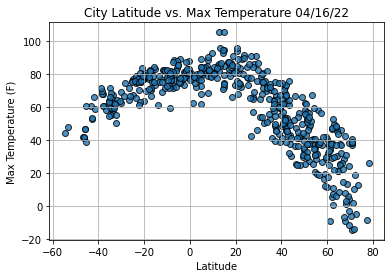

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

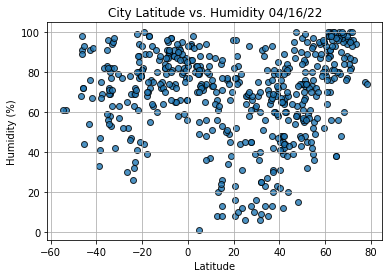

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

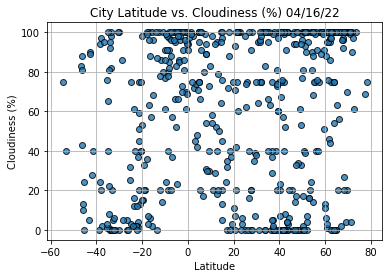

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

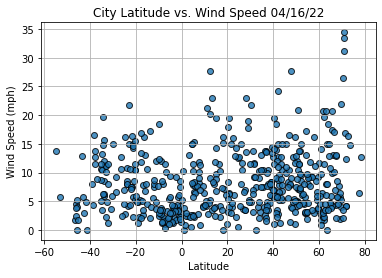

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [17]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
index13 = city_data_df.loc[13]
index13

City                       Bethel
Country                        US
Date          2022-04-16 17:52:15
Lat                       41.3712
Lng                       -73.414
Max Temp                    68.88
Humidity                       45
Cloudiness                      0
Wind Speed                  18.41
Name: 13, dtype: object

In [19]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

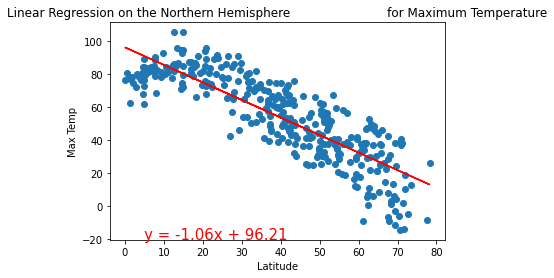

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(5,-20))

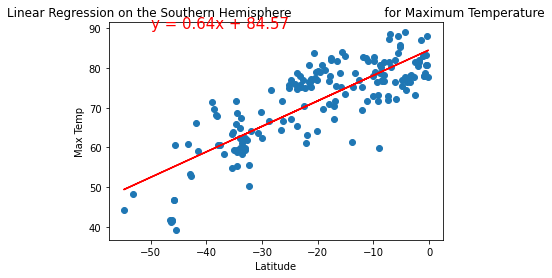

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                       for Maximum Temperature', 'Max Temp',(-50,90))

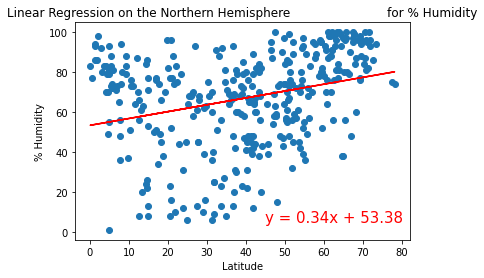

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(45,5))

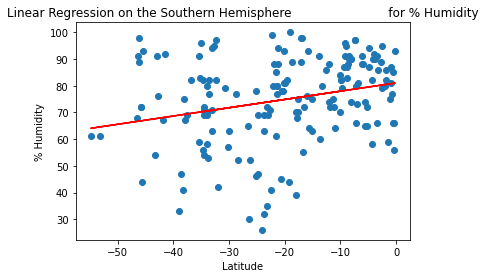

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

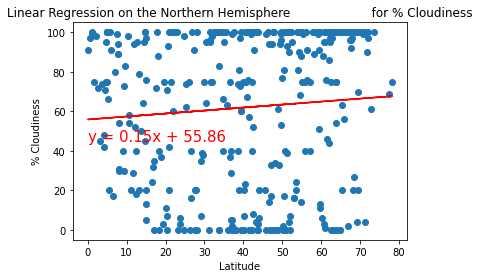

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \
                    for % Cloudiness', '% Cloudiness',(0,45))

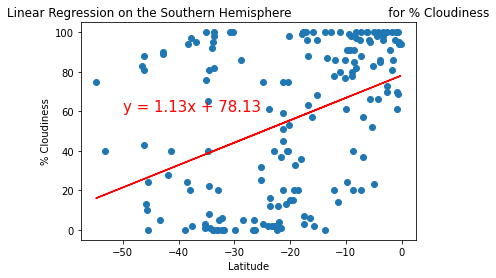

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))


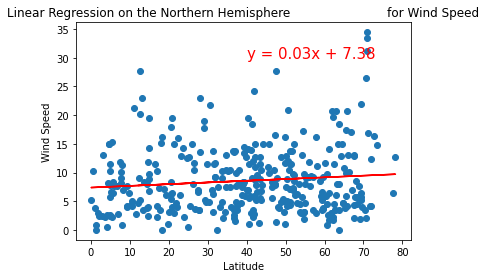

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,30))

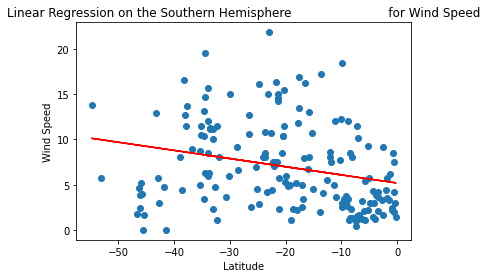

r_value is equal to -0.2597959462751962


In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,25))

(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print("r_value is equal to",r_value)